# Jamboree Education - Linear Regression

## Business Problem
Applying to top global universities is highly competitive. Students often make application decisions without knowing their probability of acceptance.
Jamboree, a global test-prep and admissions counseling organization, recently launched a feature that estimates the probability of admission into Ivy League and other top universities from an Indian applicant’s perspective.

The objective of this project is to determine:
- Which applicant profile factors significantly influence graduate admission decisions,
- How these factors interact with each other,
- How accurately we can predict the Chance of Admit for new applicants.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Machine Learning Problem Definition
- **Type**: Supervised Regression
- **Target Variable**: Chance of Admit (0 to 1)
- **Predictors**: GRE Score, TOEFL Score, University Rating, SOP Strength, LOR Strength, CGPA, Research Experience
- **Evaluation Metrics**: R², Adjusted R², RMSE, MAE

## Dataset Overview
|Attribute|Description|
|-|-|
|GRE Score | Graduate Record Exam score (out of 340)|
|TOEFL Score | English proficiency score (out of 120)|
|University Rating | Rating of target university (1–5)|
|SOP Strength | Statement of Purpose rating (1–5)|
|LOR Strength | Letter of Recommendation rating (1–5)|
|CGPA | Undergraduate GPA (out of 10)|
|Research | Has research experience (0/1)|
|Chance of Admit|Probability of getting an admission (0–1)|


In [3]:
df.shape

(500, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


- Data Types: All variables are numeric
- Unique Row Identifier (Serial No.) is to be removed before modeling

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
df.drop(columns=['Serial No.'], inplace=True)

In [8]:
df.rename(columns={
    'GRE Score': 'GRE_Score',
    'TOEFL Score': 'TOEFL_Score',
    'University Rating': 'University_Rating',
    'Chance of Admit ': 'Chance_of_Admit',
    'LOR ': 'LOR'
}, inplace=True)

In [9]:
df.isna().sum()

GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

In [10]:
df.duplicated().sum()

0

- No duplicate or missing values were found; hence no imputation was required.

# Exploratory Data Analysis

In [11]:
num_cols = ['GRE_Score', 'TOEFL_Score', 'University_Rating',
            'SOP', 'LOR', 'CGPA', 'Chance_of_Admit']
cat_cols = ['Research']

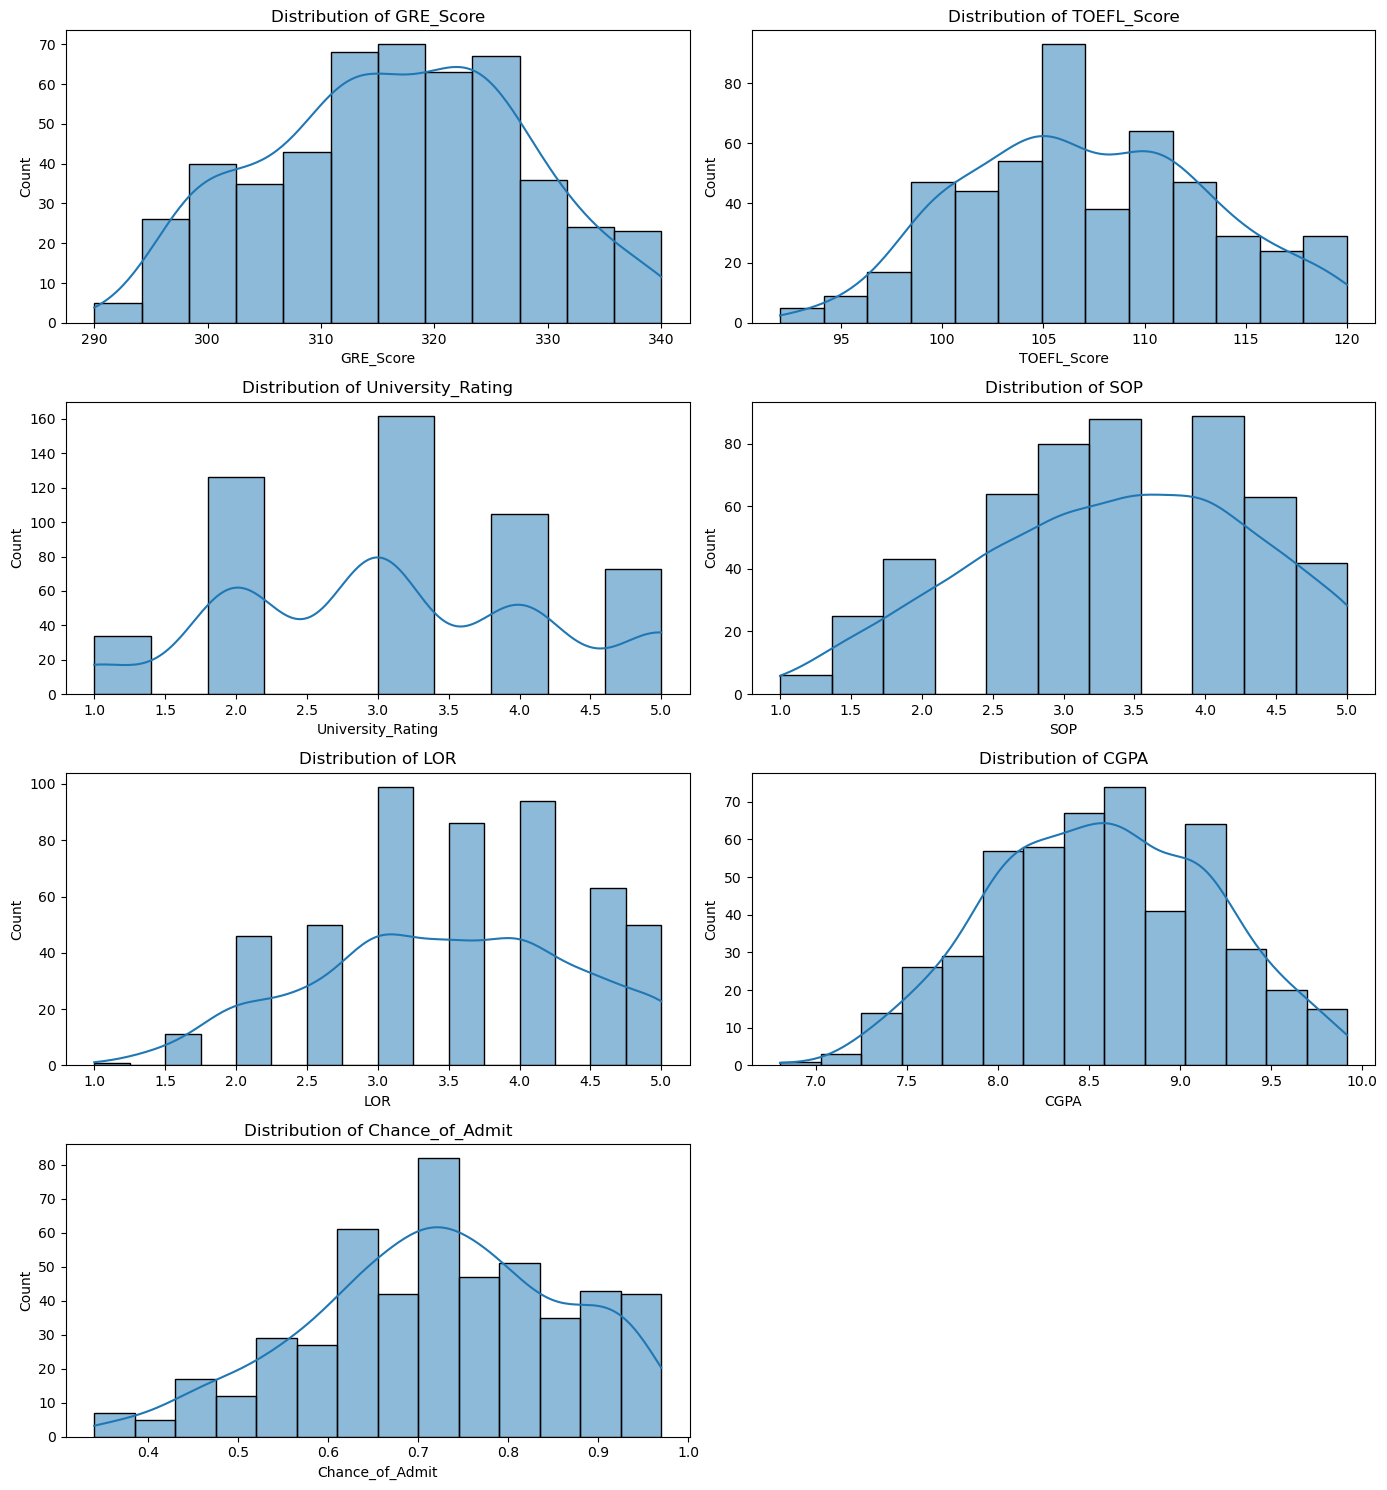

In [12]:
plt.figure(figsize=(14, 15))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

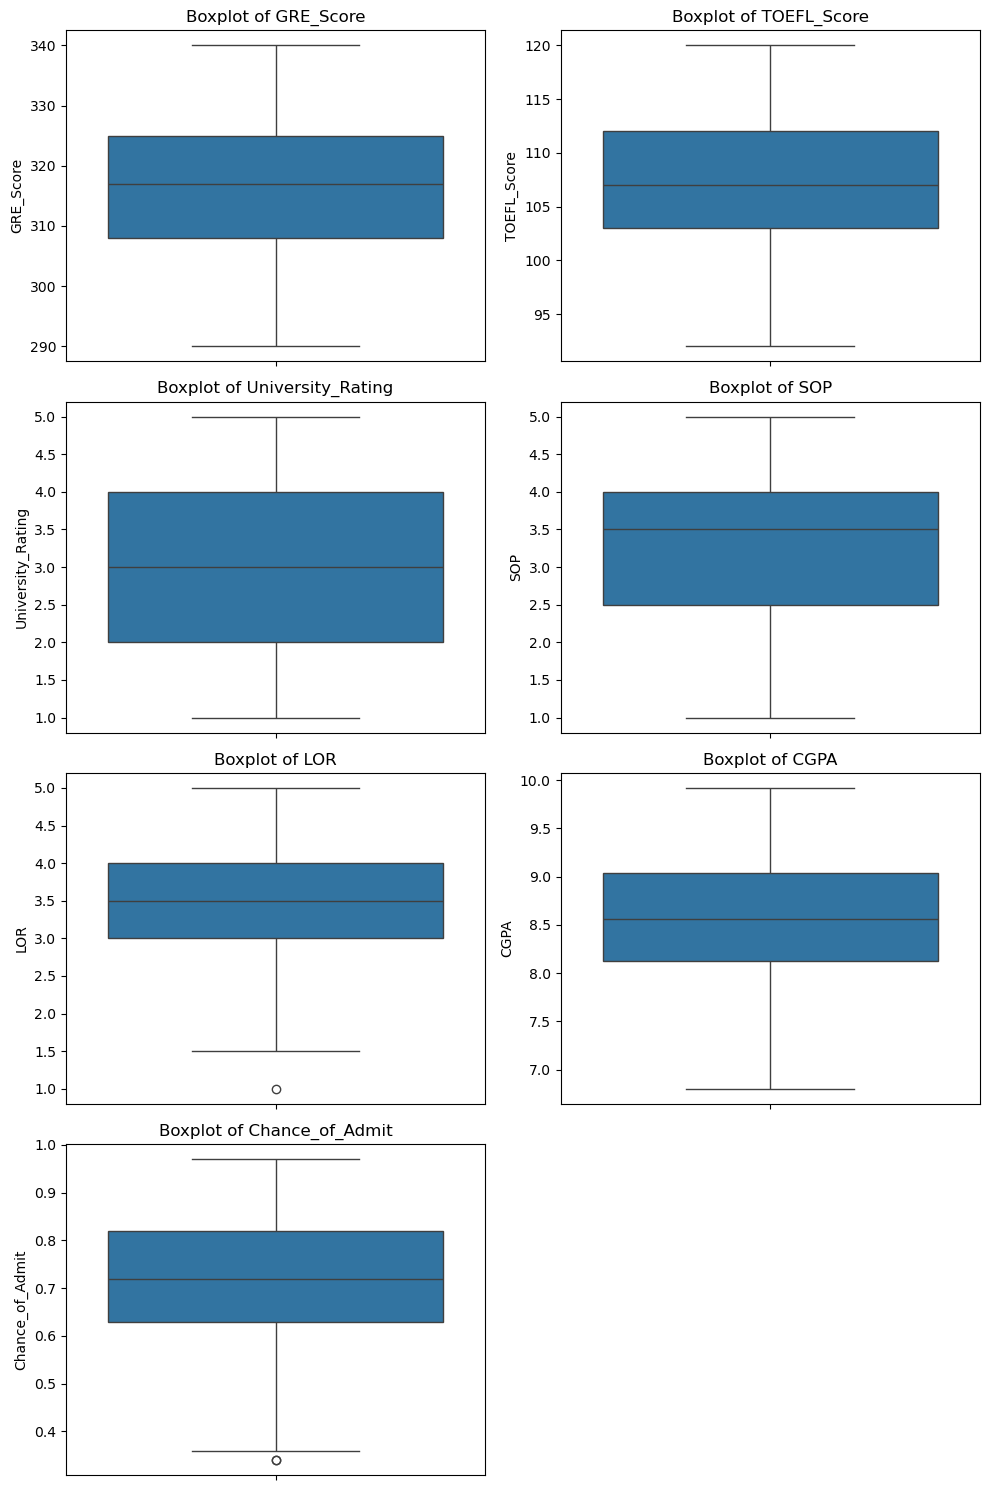

In [13]:
plt.figure(figsize=(10, 15))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

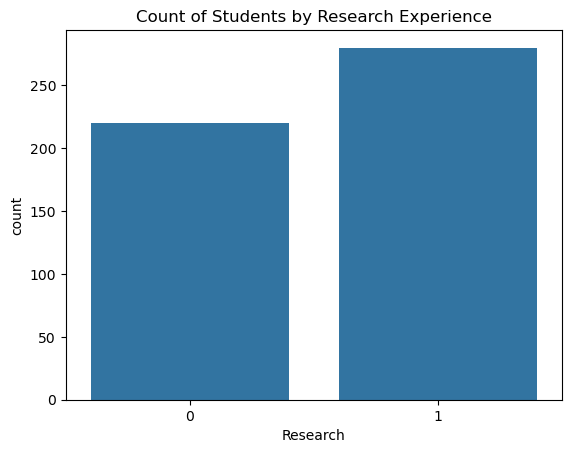

Research
1    0.56
0    0.44
Name: proportion, dtype: float64

In [14]:
sns.countplot(x='Research', data=df)
plt.title("Count of Students by Research Experience")
plt.show()

df['Research'].value_counts(normalize=True)

### Univariate Analysis (Key Observations)
- GRE and TOEFL scores followed a near-normal distribution with most applicants scoring above average.
- SOP, and LOR were mildly left-skewed — majority applicants had ratings 3–5.
- CGPA distribution was negatively skewed; most applicants reported a CGPA above 7.5.
- Chance of Admit distribution was left-skewed — high probability candidates dominate the dataset.

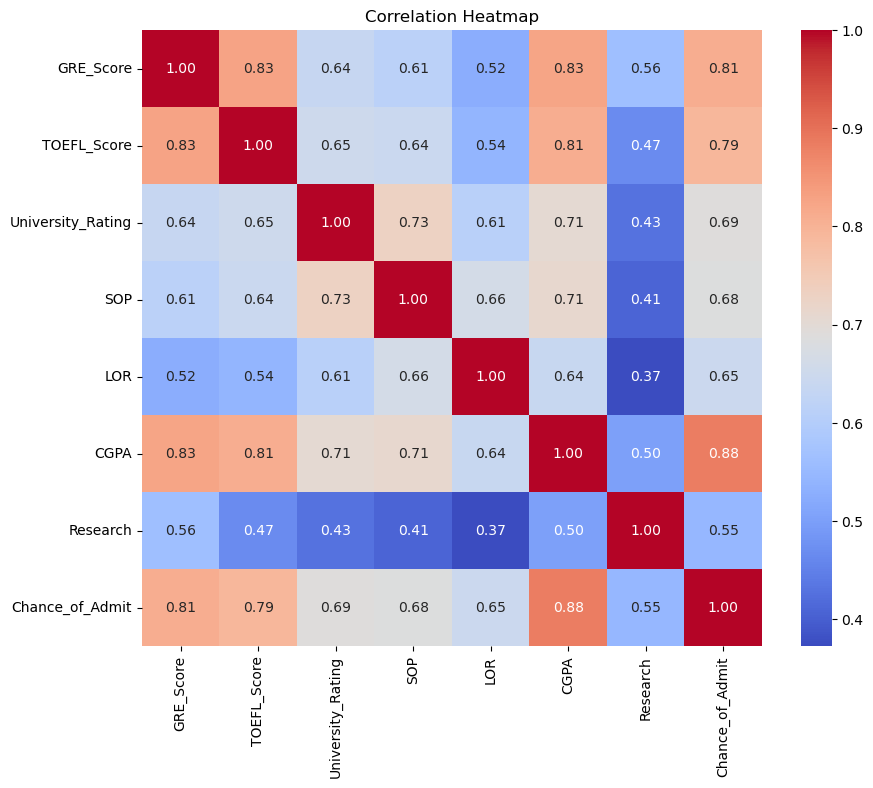

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

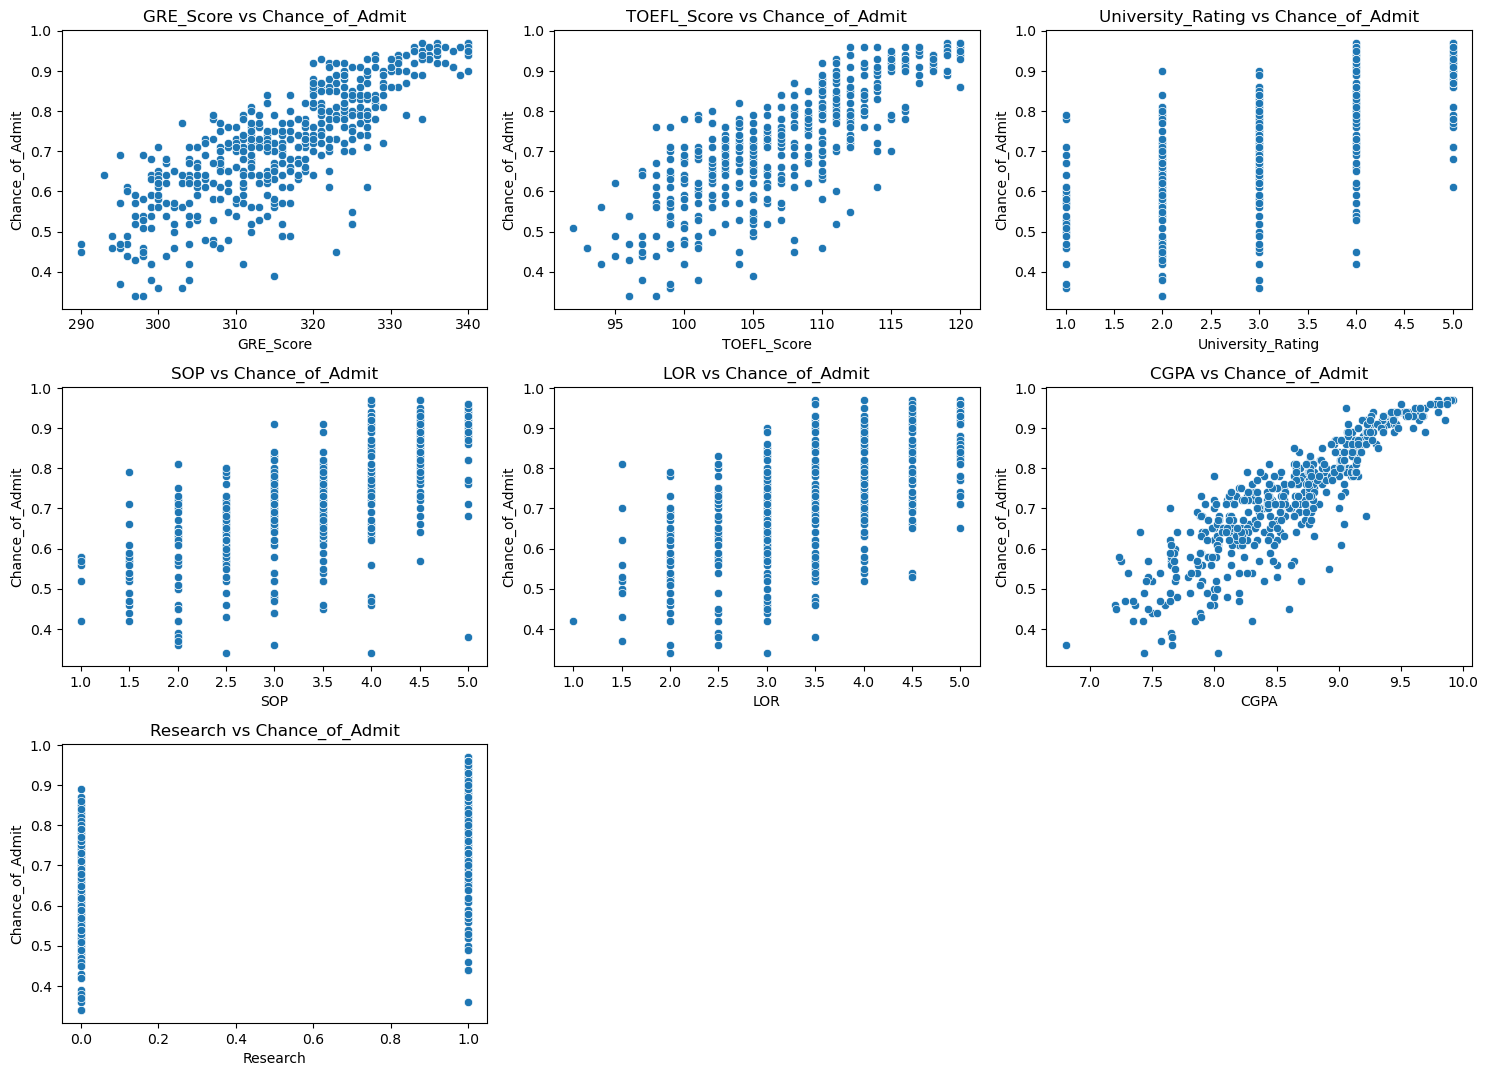

In [16]:
predictors = ['GRE_Score', 'TOEFL_Score', 'University_Rating',
              'SOP', 'LOR', 'CGPA', 'Research']

plt.figure(figsize=(15, 14))

for i, col in enumerate(predictors, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(x=df[col], y=df['Chance_of_Admit'])
    plt.title(f"{col} vs Chance_of_Admit")
plt.tight_layout()
plt.show()

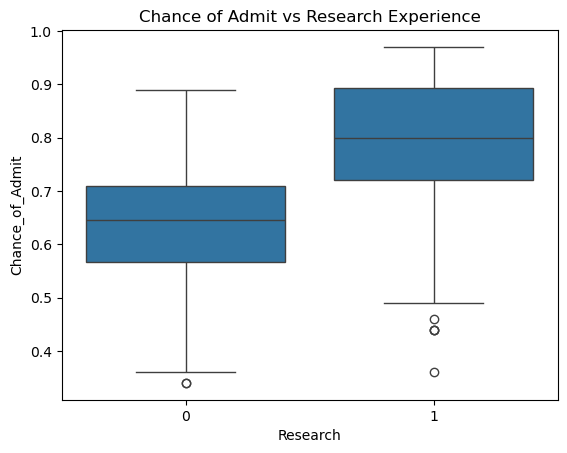

In [17]:
sns.boxplot(x='Research', y='Chance_of_Admit', data=df)
plt.title("Chance of Admit vs Research Experience")
plt.show()

### Bivariate Analysis (Key Observations)
- Chance of Admit increases linearly with GRE, TOEFL, and CGPA.
- Students with Research experience had a notably higher median Chance of Admit than those without.
- Strong positive correlations were found:
    - CGPA  ↗  Chance of Admit
    - GRE  ↗  Chance of Admit
    - TOEFL  ↗  Chance of Admit
- Mild correlations:
    - SOP, LOR, and University Rating  ↗  Chance of Admit

## Data Preprocessing
- Serial No. column removed (irrelevant unique identifier)
- No missing or duplicate observations
- Train–test split: 80% training, 20% testing
- Predictors are standardized using MinMaxScaler

In [18]:
X = df.drop(columns=['Chance_of_Admit'])
y = df['Chance_of_Admit']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = scaler.transform(X_test)

## Model Building and Interpretation

In [21]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train_scaled)  # adds the intercept term
ols_model = sm.OLS(list(y_train), X_train_sm).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Wed, 03 Dec 2025   Prob (F-statistic):          3.41e-142
Time:                        19:58:04   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3556      0.01

### Linear Regression using Statsmodels (OLS)
	•	R² = 0.821
	•	Adj. R² = 0.818

In [22]:
coeff_df = pd.DataFrame({
    'Predictor': ols_model.params.index,
    'Coefficient': ols_model.params.values
})
coeff_df.sort_values(by='Coefficient', ascending=False)

,Predictor,Coefficient
0,const,0.355584
6,CGPA,0.351085
1,GRE_Score,0.121722
2,TOEFL_Score,0.083884
5,LOR,0.060333
7,Research,0.024027
3,University_Rating,0.010275
4,SOP,0.007255


- CGPA emerged as the strongest predictor, followed by GRE and TOEFL.

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = pd.DataFrame()
vif_df["Feature"] = X_train_scaled.columns
vif_df["VIF"] = [variance_inflation_factor(X_train_scaled.values, i)
                 for i in range(X_train_scaled.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df

,Feature,VIF
5,CGPA,39.76
0,GRE_Score,31.20
1,TOEFL_Score,26.76
3,SOP,18.57
4,LOR,11.01
2,University_Rating,10.95
6,Research,3.36


In [24]:
cols = vif_df["Feature"][1:].values
X2 = X_train_scaled[cols]

X2_sm = sm.add_constant(X2)
sm_model = sm.OLS(list(y_train), X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     220.9
Date:                Wed, 03 Dec 2025   Prob (F-statistic):          1.48e-122
Time:                        19:58:04   Log-Likelihood:                 512.81
No. Observations:                 400   AIC:                            -1012.
Df Residuals:                     393   BIC:                            -983.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3921      0.01

In [25]:
residuals = ols_model.resid
residuals.mean()

6.437905764045127e-16

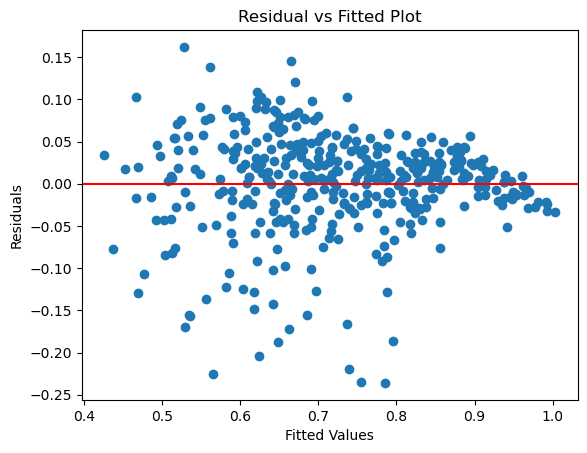

In [26]:
fitted = ols_model.predict(X_train_sm)

plt.scatter(fitted, residuals)
plt.axhline(0, color='red')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted Plot")
plt.show()

In [27]:
import statsmodels.stats.api as sms
labels = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X_train_sm)
dict(zip(labels, test))

{'F statistic': 0.9506884043302333, 'p-value': 0.6367845922442996}

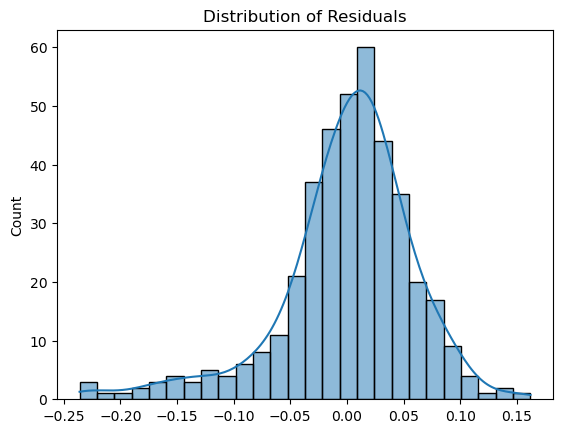

In [28]:
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()

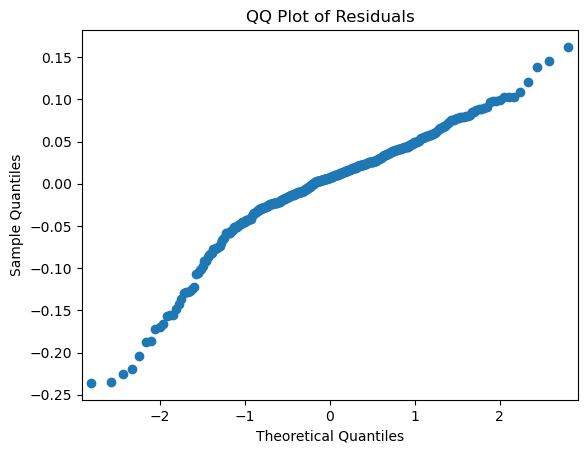

In [29]:
import scipy.stats as stats

sm.qqplot(residuals)
plt.title("QQ Plot of Residuals")
plt.show()

## Assumptions of Linear Regression
|Assumption|Result|
|-|-|
Multicollinearity (VIF)|Removing higest VIF feature CGPA results in significant reduction in r2 score
Mean of residuals|≈ 0 → satisfied
Linearity|Residual vs fitted showed random scatter → satisfied
Homoscedasticity|Breusch–Pagan p > 0.05 → satisfied (no heteroscedasticity)
Normality|Histogram + QQ plot showed near-normal residuals → satisfied


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_train_pred = ols_model.predict(X_train_sm)
y_test_pred  = ols_model.predict(sm.add_constant(X_test_scaled))

def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

train_mae, train_rmse, train_r2 = evaluate(y_train, y_train_pred)
test_mae,  test_rmse,  test_r2  = evaluate(y_test, y_test_pred)

print("Train → MAE:", train_mae, " RMSE:", train_rmse, " R²:", train_r2)
print("Test  → MAE:", test_mae,  " RMSE:", test_rmse,  " R²:", test_r2)

Train → MAE: 0.0425333406116432  RMSE: 0.059384808482100516  R²: 0.8210671369321554
Test  → MAE: 0.042722654277053636  RMSE: 0.060865880415783044  R²: 0.8188432567829632


In [31]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_scaled, y_train)

y_train_pred_ridge = ridge_model.predict(X_train_scaled)
y_test_pred_ridge  = ridge_model.predict(X_test_scaled)

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [32]:
ridge_train_mae, ridge_train_rmse, ridge_train_r2 = evaluate(y_train, y_train_pred_ridge)
ridge_test_mae,  ridge_test_rmse,  ridge_test_r2  = evaluate(y_test, y_test_pred_ridge)

print("Ridge - Train: MAE:", ridge_train_mae, "RMSE:", ridge_train_rmse, "R²:", ridge_train_r2)
print("Ridge - Test : MAE:", ridge_test_mae,  "RMSE:", ridge_test_rmse,  "R²:", ridge_test_r2)

Ridge - Train: MAE: 0.042636674066134736 RMSE: 0.05970896670840863 R²: 0.8191083576569715
Ridge - Test : MAE: 0.04335680904079189 RMSE: 0.06131965392113702 R²: 0.816132031442151


In [33]:
ridge_coeffs = pd.DataFrame({
    'Feature': X_train.columns,
    'Ridge_Coeff': ridge_model.coef_
}).sort_values(by='Ridge_Coeff', ascending=False)
ridge_coeffs

,Feature,Ridge_Coeff
5,CGPA,0.285616
0,GRE_Score,0.132129
1,TOEFL_Score,0.096103
4,LOR,0.064755
6,Research,0.026061
3,SOP,0.018948
2,University_Rating,0.018295


In [34]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.01, random_state=42)  # small alpha to avoid killing everything
lasso_model.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso  = lasso_model.predict(X_test_scaled)

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [35]:
lasso_train_mae, lasso_train_rmse, lasso_train_r2 = evaluate(y_train, y_train_pred_lasso)
lasso_test_mae,  lasso_test_rmse,  lasso_test_r2  = evaluate(y_test, y_test_pred_lasso)

print("Lasso - Train: MAE:", lasso_train_mae, "RMSE:", lasso_train_rmse, "R²:", lasso_train_r2)
print("Lasso - Test : MAE:", lasso_test_mae,  "RMSE:", lasso_test_rmse,  "R²:", lasso_test_r2)

Lasso - Train: MAE: 0.06172825535842378 RMSE: 0.08023567825767028 R²: 0.6733561791309286
Lasso - Test : MAE: 0.06179644627856105 RMSE: 0.07979556203643419 R²: 0.6886390356620824


In [36]:
lasso_coeffs = pd.DataFrame({
    'Feature': X_train.columns,
    'Lasso_Coeff': lasso_model.coef_
}).sort_values(by='Lasso_Coeff', ascending=False)
lasso_coeffs

,Feature,Lasso_Coeff
5,CGPA,0.156947
0,GRE_Score,0.073900
6,Research,0.044329
2,University_Rating,0.040503
1,TOEFL_Score,0.032188
4,LOR,0.019325
3,SOP,0.000000


## Model Evaluation

In [37]:
comparison = pd.DataFrame({
    'Model': ['OLS', 'Ridge', 'Lasso'],
    'Train_R2': [train_r2, ridge_train_r2, lasso_train_r2],
    'Test_R2':  [test_r2,  ridge_test_r2,  lasso_test_r2],
    'Train_RMSE': [train_rmse, ridge_train_rmse, lasso_train_rmse],
    'Test_RMSE':  [test_rmse,  ridge_test_rmse,  lasso_test_rmse]
})
comparison

,Model,Train_R2,Test_R2,Train_RMSE,Test_RMSE
0,OLS,0.821067,0.818843,0.059385,0.060866
1,Ridge,0.819108,0.816132,0.059709,0.061320
2,Lasso,0.673356,0.688639,0.080236,0.079796


#### Observation
Test scores across OLS, Ridge, and Lasso were similar, indicating:
- Stable model
- Low overfitting
- Only mild multicollinearity in dataset

## Business Insights & Recommendations for Jamboree

**Key drivers of graduate admissions (priority order)**
1. **CGPA** — strongest and most consistent predictor
2. **GRE Score**
3. **TOEFL Score**
4. **Research Experience**
5. **SOP & LOR**
6. **University Rating**

**Student Strategy Suggestions**
Profile Weakness|Recommendation
|-|-|
Low CGPA|Improve via projects/research + strong SOP/LOR to compensate
Low GRE|Retake GRE — high ROI
No research|Complete at least one research/major project
Weak SOP/LOR|Seek guidance from mentorship/counseling support


**How Jamboree can monetize / productize the model**
- Integrate admission probability calculator on website
- Provide improvement suggestions based on what-if predictions
    - e.g., “Increasing GRE from 315 → 325 improves admit chance by 8%”
- Tier-based university recommendations:
    - Dream / Target / Safe universities
- Personalized study plans & counseling based on predicted gaps

**Future Scope — Improving the Model**

To further increase prediction accuracy:
- Collect additional features:
    - Work experience
    - UG college tier
    - Target degree specialization
    - Publications & internships
- Explore non-linear ML models
    - Random Forest, Gradient Boosting, XGBoost
- Hyperparameter Tuning
- Build yearly retraining loop using real outcomes of past applicants

## Conclusion

This project successfully:
- Identified the most influential factors in graduate admissions
- Built a statistically robust prediction model
- Achieved strong predictive performance while satisfying regression assumptions
- Generated actionable insights that Jamboree can directly use for decision-making, product enhancement, and revenue growth

Overall, the model demonstrates **high reliability** and **practical utility** in providing realistic admission probability estimates to students.